<a href="https://colab.research.google.com/github/lesyayu/robot_deams-_sheets/blob/main/hw_4_arbeit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лінійна регресія

У цьому домашньому завданні ми працюємо з набором даних про рівень щастя у країнах за 2019 рік. Він доступний в кабінеті або можна завантажити з Kaggle [змагання](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv).

Усі імпорти розміщуємо зверху, під цією секцією.

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
rcParams['figure.figsize'] = 12, 6


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# for download dataset

from google.colab import files
uploaded = files.upload()

import io




Saving 2019.csv to 2019.csv


1. Зчитайте дані за допомогою pandas у змінну `df`.

In [40]:
df = pd.read_csv(io.BytesIO(uploaded['2019.csv']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


2. Виведіть діаграму розсіювання ознак `Score` та `GDP per capita`, використовуючи метод `regplot()` з `seaborn`.

<Axes: xlabel='GDP per capita', ylabel='Score'>

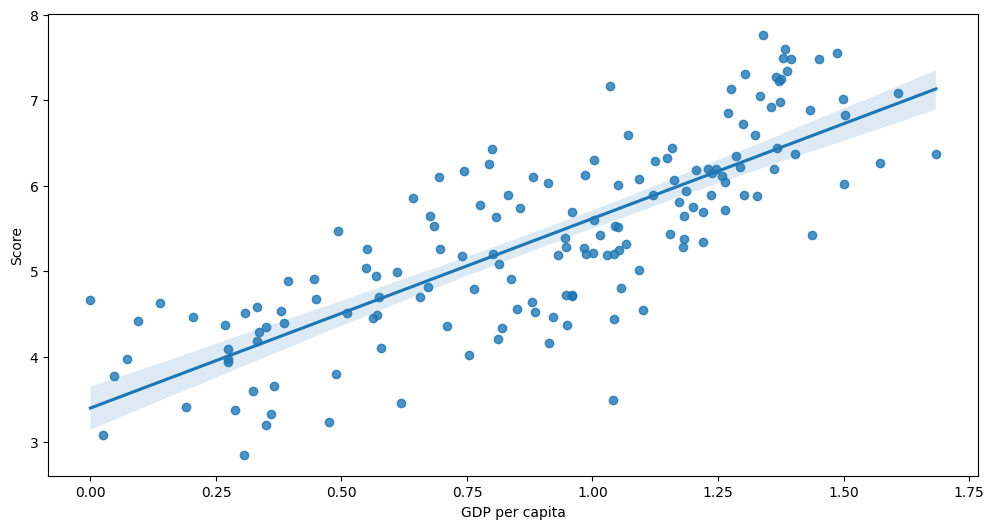

In [43]:
# x='Economy (GDP per Capita)', y='Happiness Score'
sns.regplot(x='GDP per capita', y='Score', data=df)
#plt.show()

Ми моделюватимемо цю залежність. Тобто незалежною змінною є `GDP per capita`, залежною `Score`. Судячи з діаграми розсіювання, залежність між цими двома змінними має добре описуватись лінійною моделлю.

## Розв'язання задачі лінійної регресії методом градієнтного спуску

Позначення:
- `X` - матриця ознак
- `y` - цільова змінна
- `theta` - вектор параметрів
- `alpha` - темп навчання (learning rate)

<font color='blue'>**[Optional]**</font> 3. Реалізуйте формулу передбачення лінійної регресії у методі `predict`. Метод повертає передбачення. Нагадаю, що для кожного спостереження з матриці ознак передбачення знаходимо за допомогою наступної формули:
$$x \in X, i \in [1,m], j : \\ \hat{y}_i = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n = \theta^T x ,\\
\text{де m - кількість спостережень, } \\
\text{n - кількість ознак, } \\
x_0 = 1 \ \text{для всіх спостережень}.
$$

Передбачення всіх спостережень у матриці Х можемо знайти як множення матриці ознак на ваги.

In [ ]:
def predict(X, theta):
    prediction = ...
    return prediction

<font color='blue'>**[Optional]**</font> 4. Доповніть обчислення значення функції витрат, формула якої наведена в слайдах лекції про лінійну регресію (підказка - формула така сама, якби ми рахували середньоквадратичну помилку).  
Метод `cost()` приймає вектор параметрів `theta`, матрицю наших ознак `X` та реальні значення цільової змінної `y`.


In [ ]:
def cost(y_true, y_estimate):
    m = len(y_true)
    cost_value = ... # ваш код тут
    return cost_value

<font color='blue'>**[Optional]**</font> 5. Ознайомтеся з реалізацією методу `get_gradient()`, який повертає вектор часткових похідних функції витрат за кожним із параметрів лінійної регресії.
Доповніть метод `gradient_descent()`, який дозволить реалізувати алгоритм градієтного спуску. Під час градієнтного спуку ми оновлюємо параметри згідно з формулою:
$$
\text{для кожного} \ j \in [0, n]: \quad \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta), \\
\text{де n - кількість ознак}
$$
  Метод градієнтного спуску оновлює ваги (модель навчається) поки вони не перестануть змінюватися від ітерації до ітерації, тобто поки Евклідова відстань (звичайна відстань між веткорами, як у шкільній геометрії) між векторами ваг за останні дві ітерації не буде меншою за невелику константу (зазвичай позначається як $\epsilon$ (епсілон), ми встановимо $\epsilon=10^{-6}$).

В `gradient_descent()` заповніть всі місця, де стоять три крапки. Використовуйте реалізовані у попередніх завданнях методи `cost()` та `predict()`, і звичайно ж Вам знадобиться метод `get_gradient()`.

In [ ]:
def get_gradient(X, y, y_estimate):
    gradient =
    return gradient

In [ ]:
def gradient_descent(X, y, theta, learning_rate, eps, max_iterations):
    cost_history = []
    theta_history = []
    iterations = 1
    while True:
        y_estimate = ... # передбачення з поточними значеннями вагів
        gradient = ... # значення часткових похідних функції витрат з поточними значеннями ваг
        cost_value = ... # значення функції витрат при поточних вагах
        cost_history.append(cost_value)
        new_theta = ...
        theta_history.append(new_theta)
        # Умова зупинки, описана в умові завдання
        if ... < eps:
            print("Алгоритм зійшовся.")
            break

        # Друга умова зупинки
        if iterations >= max_iterations:
            print("Досягнуто максимальної кількості ітерацій")
            break

        # Виводимо інформацію кожні 100 ітерацій
        if iterations % 100 == 0:
            print ("Ітерація: %d - Помилка на трейн даних: %.4f" % (iterations, cost_value))

        iterations += 1
        theta = new_theta
    return theta, cost_history, theta_history, iterations


Підготуємо дані.

In [45]:
X = df['GDP per capita'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

6. Розділіть `X` та `y` на `train` і `test` підвиборки у співвідношенні 80/20. Оскільки у нас мало даних, валідаційну вибірку не виділятимемо. Запишіть результати у `X_train`, `y_train`, `X_test`, `y_test`.

In [46]:
# Розділення даних на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#X_train is series


7.Реалізуйте масштабування ознак із використанням `MinMaxScaler`. Пам'ятайте про те, як ми застосовуємо масштабування ознак на`train` та `test` вибірках.

In [47]:
# Створення об'єкту MinMaxScaler
scaler = MinMaxScaler()

# Масштабування навчальної вибірки
X_train_scaled = scaler.fit_transform(X_train)

# Масштабування тестової вибірки
# ВАЖЛИВО: використовувати ті ж параметри масштабування, що й для навчальної вибірки
X_test_scaled = scaler.transform(X_test)

# Тепер X_train_scaled та X_test_scaled містять масштабовані ознаки


<font color='blue'>**[Optional]**</font> 8. Додайте колонку з одиниць до масивів `X_train`, `X_test`.

In [35]:
# Додавання колонки з одиницями до X_train

ones_train = np.ones((X_train.shape[0], 1)) # Створення колонки одиниць для кожного рядка в X_train
X_train = np.hstack((X_train, ones_train)) # Горизонтальне з'єднання колонки з X_train

# Додавання колонки з одиницями до X_test
ones_test = np.ones((X_test.shape[0], 1)) # Створення колонки одиниць для кожного рядка в X_test
X_test  = np.hstack((X_test, ones_test)) # Горизонтальне з'єднання колонки з X_test


<font color='blue'>**[Optional]**</font> 9. Встановіть темп навчання рівний 0.01, точність епсілон рівний $10^{-6}$, кількість ітерацій дорівнює 20000 і запустіть градієнтний спуск на тренувальні дані, передавши всі необхідні параметри.

In [ ]:
learning_rate = ...
max_iterations = ...
epsilon = ...

theta = np.random.randn(2,1)

theta, cost_history, theta_history, iterations = gradient_descent(...)

<font color='blue'>**[Optional]**</font> 10. Відобразіть на лінійному графіку значення змінної `cost_history`. Використовуйте будь-яку бібліотеку для візуалізації на вибір.

Відобразіть лише перші 200 ітерацій. Схоже, що після них модель мало навчається. Ми могли б застосувати техніку early stopping у даному випадку та зупинитися на деякій невеликій кількості ітерацій. Зазвичай ця техніка застосовується, щоб уникнути перенавчання. При цьому втрачається трохи точності на train set.

Виведемо отримані параметри та останнє значення функції витрат.

In [ ]:
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][-1],theta[1][-1]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('Number of iterateions: {:d}'.format(iterations))

<font color='blue'>**[Optional]**</font> 11. Знайдіть прогнози на `X_train`, `X_test` та порахуйте `mean_squared_error` помилку прогнозів обох підвибірках.

<font color='blue'>**[Optional]**</font> 12. Виведіть діаграму розсіювання ознак `Score` та `GDP per capita` та додайте лінію прогнозу моделі.

13. Навчіть лінійну регресію на наборі даних, що складається тільки з ознаки `GDP per capita`, але тепер використовуючи LinearRegression з sklearn.   
Подумайте, чи треба в sklearn модель подавати стовпчик з одиниць, яку ми подавали в самописну модель.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Створення екземпляра LinearRegression
model = LinearRegression()

# Навчання моделі
model.fit(X_train, y_train)

# Оцінювання моделі (опціонально)
model.score(X_test, y_test)


0.5119632343226919

Порівняйте помилку на тестовій вибірці лінійної регресії, написаної вами, та зі sklearn. Чи є різниця у значеннях?

In [69]:
#define metrics
def get_metrics(y_true, y_predicted, n_digits=5):
    params = dict(y_true=y_true, y_pred=y_predicted)
    mse = mean_squared_error(**params)
    rmse = mean_squared_error(**params, squared=False)
    return dict(mse=round(mse, n_digits), rmse=round(rmse, n_digits))

14. Навчимо лінійну регресію на більшій кількості ознак і подивимося, чи вдасться покращити модель.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


14.1 Навчіть лінійну регресію з sklearn використовуючи як набор ознак наступний: `GDP per capita`, `Social support`, `Healthy life expectancy`, `Freedom to make life choices`, `Generosity`, `Perceptions of corruption`

Не забудьте:  
1. Розділити `train` та `test`.
2. Нормувати кожну колонку даних.

In [37]:
def get_indices(X):
    train_id, test_id = train_test_split(X.index, test_size=test_size, shuffle=True, random_state=42)
    return train_id, test_id

In [ ]:
X = df.drop(['Score'],axis=1)
y = df['Score']
X = X.drop(['Country or region'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Створення об'єкту MinMaxScaler
scaler = MinMaxScaler()

# Масштабування навчальної вибірки
X_train_scaled = scaler.fit_transform(X_train)

# Масштабування тестової вибірки
# ВАЖЛИВО: використовувати ті ж параметри масштабування, що й для навчальної вибірки
X_test_scaled = scaler.transform(X_test)

# Тепер X_train_scaled та X_test_scaled містять масштабовані ознаки

#X_train_scaled

14.2 Виведіть помилку прогнозу на `train` та `test` вибірках. Порівняйте з результатом, отриманим під час навчання однією ознакою. Чи змінилися метрики?

In [64]:
test_size = 0.2

train_id, test_id = get_indices(X)

In [65]:
X.loc[train_id].shape, X.loc[test_id].shape

((124, 7), (32, 7))

In [66]:
lr = LinearRegression()

lr.fit(X.loc[train_id], y.loc[train_id])

lr.n_features_in_

7

In [67]:
y_train_pred = lr.predict(X.loc[train_id])
y_test_pred = lr.predict(X.loc[test_id])

In [70]:
get_metrics(y.loc[train_id], y_train_pred)

NameError: name 'mean_squared_error' is not defined

In [71]:
get_metrics(y.loc[train_id], y_train_pred)

NameError: name 'mean_squared_error' is not defined

NameError: name 'target_col_name' is not defined

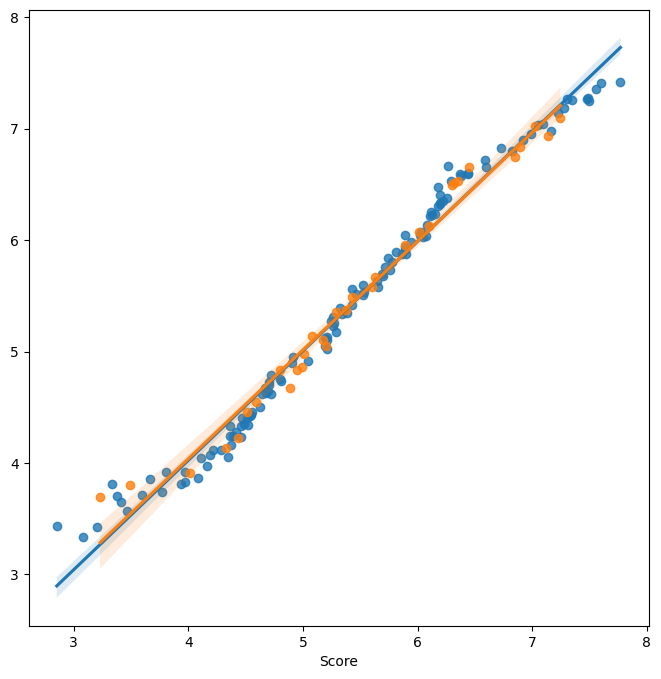

In [72]:
plt.figure(figsize=(8,8))
sns.regplot(x=y.loc[train_id], y=y_train_pred, label='train')
sns.regplot(x=y.loc[test_id], y=y_test_pred, label='test')
plt.ylabel(f'{target_col_name} pred')
plt.legend();

14.3 Виведіть коефіцієнти моделі і визначте, які ознаки мають найбільші коефіцієнти по модулю, що стоять перед ними (достатньо вивести назви ознак і коефіцієнти в одному датафреймі).

15. Навчіть модель поліноміальної регресії зі ступенем 2 на тих самих даних, що й у попередньому пункті. Використовуйте у процесі навчання `PolynomialFeatures`. Дослідіть метрики якості на трейні та тест датасетах. Чи є перенавчання (overfit)?

16. Зробіть пайплайн із кроками `MinMaxScaler`, `PolynomialFeatures` та `ElasticNet`.

Яка модель у домашньому завданні дала найкращі значення середньоквадратичної помилки на тестових даних, лін. регресія написана самостійно, лін. регресія зі sklearn, поліноміальна регресія?